<a href="https://colab.research.google.com/github/nachitog83/image_processing/blob/main/PDI_practico1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import PIL
from PIL import Image
import scipy
from scipy import misc
from google.colab import widgets

## Ejercicio 1.1

La propuesta para esta actividad consiste en manipular independientemente la
luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego
alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la
saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una
nueva imagen.

Podríamos llamar a al coeficiente de luminancia (si es menor que uno, baja la
luminancia, y viceversa), y b al coeficiente de saturación (si es menor que uno baja la
saturación, y viceversa). El workflow a implementar consiste en los siguientes pasos:
1. Normalizar los valores de RGB del pixel
2. RGB -> YIQ (utilizando la segunda matriz)
3. Y’ := aY ;
4. I’ := bI ; Q’ := bQ ;
5. Chequear que Y’ <= 1 (para que no se vaya de rango)
6. Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226
7. Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)
8. Convertir R’G’B’ a bytes y graficar el pixel

In [ ]:
img = cv2.imread('/content/drive/My Drive/ariel.jpg')

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
img_array = np.array(img)

In [ ]:
img_array.shape

(642, 1024, 3)

<function matplotlib.pyplot.show>

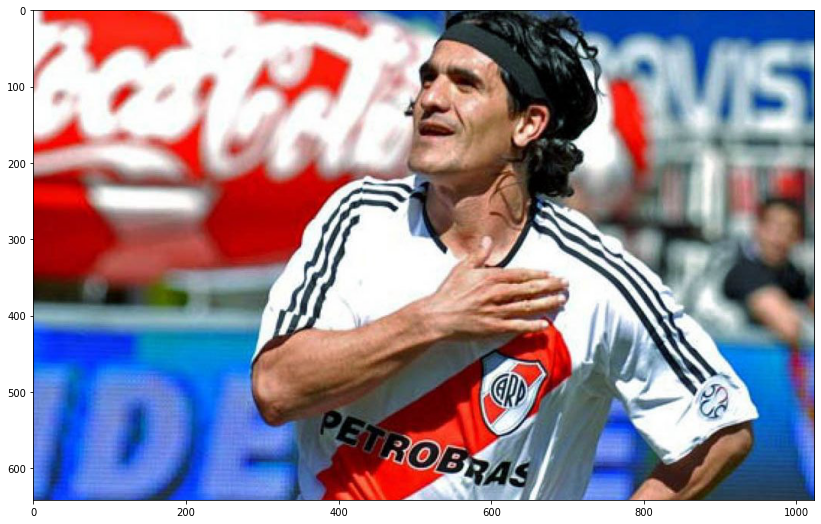

In [ ]:
fig = plt.figure(figsize=(14,12))
plt.imshow(img_array)
plt.show

In [ ]:
img_array.min(), img_array.max()

(0, 255)

<function matplotlib.pyplot.show>

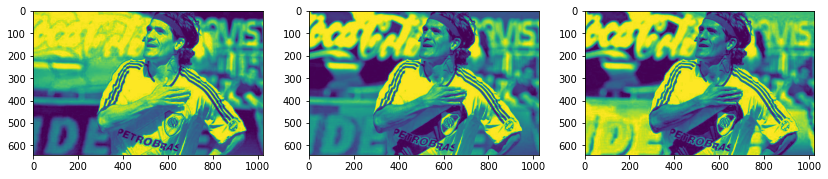

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(14,12))
ax[0].imshow(img_array[:,:,0])
ax[1].imshow(img_array[:,:,1])
ax[2].imshow(img_array[:,:,2])
plt.show

In [ ]:
normal = cv2.normalize(img_array, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normal = np.zeros(img_array.shape)
scalers = {}
for i in range(img_array.shape[2]):
    scalers[i] = MinMaxScaler()
    normal[:, :, i] = scalers[i].fit_transform(img_array[:, :, i]) 

In [ ]:
normal = img_array / 255

In [ ]:
((normal <= 1) & (normal >= 0)).all()

False

In [ ]:
normal.min(), normal.max()

(0.0, 1.0)

<function matplotlib.pyplot.show>

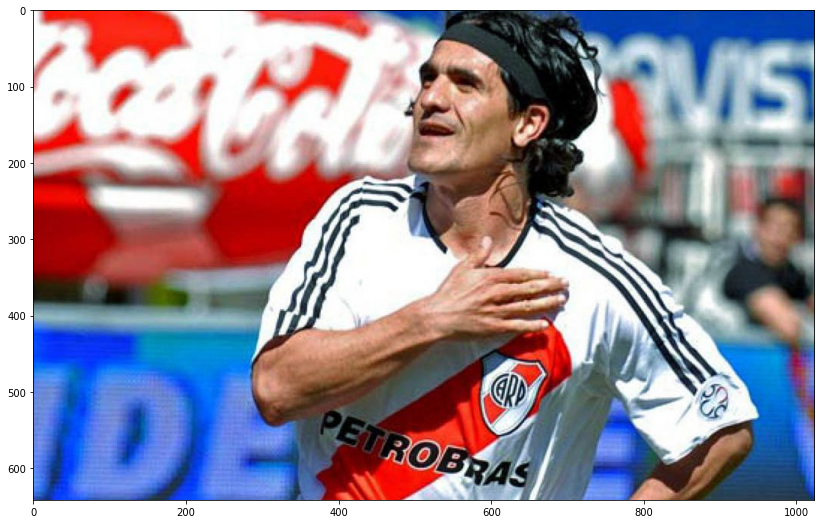

In [ ]:
fig = plt.figure(figsize=(14,12))
plt.imshow(normal)
plt.show

<function matplotlib.pyplot.show>

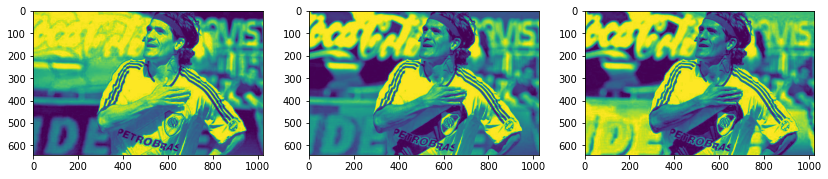

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(14,12))
ax[0].imshow(normal[:,:,0])
ax[1].imshow(normal[:,:,1])
ax[2].imshow(normal[:,:,2])
plt.show

In [ ]:
import colorsys

In [ ]:
yiq_comp = colorsys.rgb_to_yiq(normal[:,:,0],normal[:,:,1],normal[:,:,2])

In [ ]:
yiq_comp_array = np.array(yiq_comp)

In [ ]:
yiq_comp_array.shape

(3, 642, 1024)

<function matplotlib.pyplot.show>

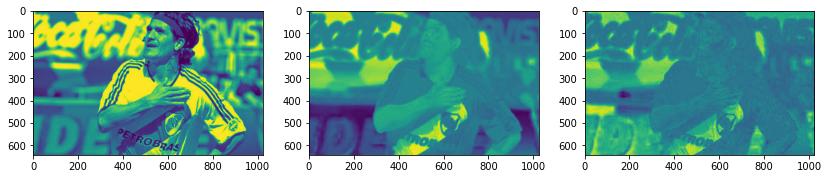

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(14,12))
ax[0].imshow(yiq_comp_array[0])
ax[1].imshow(yiq_comp_array[1])
ax[2].imshow(yiq_comp_array[2])
plt.show

In [ ]:
a = 1
b = 1

In [ ]:
yiq_comp_array_p[0] = yiq_comp_array[0] * a
yiq_comp_array_p[1] = yiq_comp_array[1] * b
yiq_comp_array_p[2] = yiq_comp_array[2] * b

In [ ]:
(yiq_comp_array_p[0] < 1).all(), (yiq_comp_array[0] < 1).all()

(True, True)

In [ ]:
((-0.5957 < yiq_comp_array_p[1]) & (yiq_comp_array_p[1] < 0.5957)).all(), ((-0.5957 < yiq_comp_array[1]) & (yiq_comp_array[1] < 0.5957)).all()

(True, True)

In [ ]:
((-0.5226 < yiq_comp_array_p[2]) & (yiq_comp_array_p[2] < 0.5226)).all(), ((-0.5226 < yiq_comp_array[2]) & (yiq_comp_array[2] < 0.5226)).all()

(True, True)

In [ ]:
rgb_conv = np.zeros(img_array.shape)
rgb_conv.shape

(642, 1024, 3)

In [ ]:
yiq_comp_array_p.shape

(3, 642, 1024)

In [ ]:
for x in range(yiq_comp_array_p[0].shape[0]):
  for y in range(yiq_comp_array_p[0].shape[1]):
    rgb_conv[x][y][0], rgb_conv[x][y][1], rgb_conv[x][y][2] = colorsys.yiq_to_rgb(yiq_comp_array_p[0][x][y], yiq_comp_array_p[1][x][y], yiq_comp_array_p[2][x][y])

In [ ]:
rgb_conv.shape

(642, 1024, 3)

In [ ]:
for i in range(rgb_conv.shape[2]):
  rgb_conv[:, :, i] = scalers[i].inverse_transform(rgb_conv[:, :, i]) 

In [ ]:
rgb_conv *= 255

In [ ]:
((rgb_conv <=255) & (rgb_conv >= 0)).all()

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

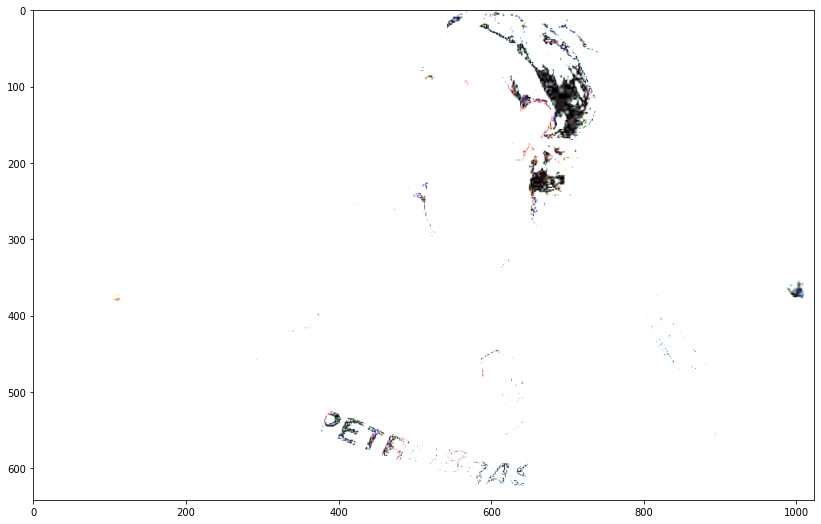

In [ ]:
fig = plt.figure(figsize=(14,12))
plt.imshow(rgb_conv)
plt.show

<function matplotlib.pyplot.show>

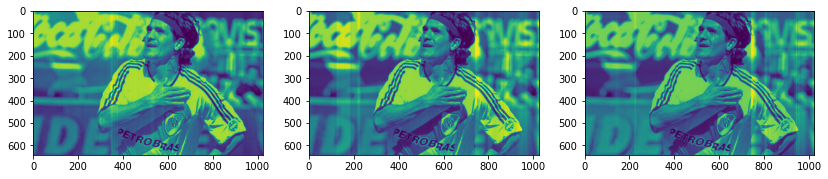

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(14,12))
ax[0].imshow(rgb_conv[:,:,0])
ax[1].imshow(rgb_conv[:,:,1])
ax[2].imshow(rgb_conv[:,:,2])
plt.show

## Ejercicio 2.1

Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la
convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.
Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no matemáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan
falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna
columna a la izquierda, entonces repito la primera columna como si estuviese en la
imagen original.

In [ ]:
imagen = cv2.imread('/content/drive/My Drive/Colab Notebooks/imagenes/f03bin1.bmp', cv2.IMREAD_GRAYSCALE)

<function matplotlib.pyplot.show>

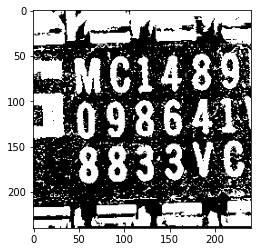

In [ ]:
plt.imshow(imagen, cmap='gray')
plt.show

In [ ]:
imagen.shape

(240, 240)

#### Filtros

In [ ]:
plano = np.outer(np.array([1/9, 1/9, 1/9]), np.array([1/9, 1/9, 1/9]))
plano

array([[0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568]])

In [ ]:
bartlett = np.outer(np.array([1, 2, 1]), np.array([1, 2, 1]))
bartlett

array([[1, 2, 1],
       [2, 4, 2],
       [1, 2, 1]])

In [ ]:
bartlett = bartlett/16

In [ ]:
gaussiano = np.outer(np.array([1,4,6,4,1]), np.array([1,4,6,4,1]))
gaussiano

array([[ 1,  4,  6,  4,  1],
       [ 4, 16, 24, 16,  4],
       [ 6, 24, 36, 24,  6],
       [ 4, 16, 24, 16,  4],
       [ 1,  4,  6,  4,  1]])

In [ ]:
gaussiano = gaussiano/256

In [ ]:
laplacev4 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplacev4

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

In [ ]:
sobel_este = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_este

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [ ]:
sobel_oeste = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_oeste

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [ ]:
sobel_norte = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_norte

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [ ]:
sobel_sur = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_sur

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [ ]:
import math
math.floor(gaussiano.shape[0]/2)

2

In [ ]:
def convolucion(imagen, kernel):
  top = math.floor(kernel.shape[0]/2)
  side = math.floor(kernel.shape[1]/2)
  imagen_nueva = np.zeros(imagen.shape)
  (ilim, jlim) = np.shape(kernel)
  (dim_x, dim_y) = np.shape(imagen)
  #agrego padding
  imagen = cv2.copyMakeBorder(imagen,top,top,side,side,cv2.BORDER_REPLICATE)
  
  for i in range(dim_x):
    for j in range(dim_y):
      imagen_entry = imagen[i:i+ilim, j:j+jlim]
      valor = np.sum(imagen_entry*kernel)
      imagen_nueva[i, j] = valor
  return imagen_nueva

,
,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Antes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Después


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

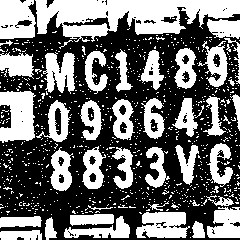

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

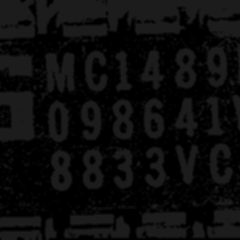

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(240, 240)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(240, 240)


<IPython.core.display.Javascript object>

In [ ]:
#@title Aplicar Filtro{ run: "auto" }
kernel = plano #@param ["plano", "bartlett", "gaussiano", "laplacev4", "sobel_este", "sobel_oeste", "sobel_norte", "sobel_sur"] {type:"raw", allow-input: true}
imagen_nueva = convolucion(imagen, kernel)
#creamos la grilla
grid = widgets.Grid(3, 2)

#ahora rellenamos las celdas
with grid.output_to(0, 0):
  print("Antes")
  
with grid.output_to(0, 1):
  print("Después")

with grid.output_to(1, 0):
  cv2_imshow(imagen)
  
with grid.output_to(1, 1):
  cv2_imshow(imagen_nueva)

with grid.output_to(2, 0):
  print(imagen.shape)
  
with grid.output_to(2, 1):
  print(imagen_nueva.shape)